**Breast 'malignant' or 'benign' clasification**





*   Objective : Clasify the breast images as 'malignant' or 'benign'
*   2 class clasification





*   Data set : Breast Ultrasound Images Dataset
*   Data source : https://www.kaggle.com/aryashah2k/breast-ultrasound-images-dataset

Data Preparation:

*   Cleaned the data set (removed all mask images)

*   Copied Data set to google drive

*   Mounted google drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/BreastCancer_Images_1.zip

Archive:  /content/drive/MyDrive/BreastCancer_Images_1.zip
   creating: BreastCancer_Images_1/
   creating: BreastCancer_Images_1/Test/
   creating: BreastCancer_Images_1/Test/benign/
  inflating: BreastCancer_Images_1/Test/benign/benign (418).png  
  inflating: BreastCancer_Images_1/Test/benign/benign (419).png  
  inflating: BreastCancer_Images_1/Test/benign/benign (420).png  
  inflating: BreastCancer_Images_1/Test/benign/benign (421).png  
  inflating: BreastCancer_Images_1/Test/benign/benign (422).png  
  inflating: BreastCancer_Images_1/Test/benign/benign (423).png  
  inflating: BreastCancer_Images_1/Test/benign/benign (424).png  
  inflating: BreastCancer_Images_1/Test/benign/benign (425).png  
  inflating: BreastCancer_Images_1/Test/benign/benign (426).png  
  inflating: BreastCancer_Images_1/Test/benign/benign (427).png  
  inflating: BreastCancer_Images_1/Test/benign/benign (428).png  
  inflating: BreastCancer_Images_1/Test/benign/benign (429).png  
  inflating: BreastCance

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical,plot_model

Sample image view

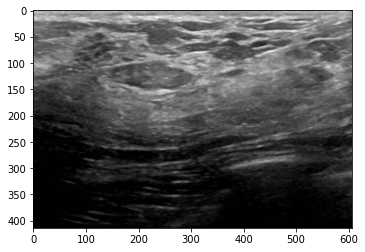

In [ ]:
img = cv2.imread(r"/content/BreastCancer_Images_1/Test/benign/benign (418).png")
plt.imshow(img)
plt.show()

In [ ]:
# create a data generator object for train and test to load data
batch_size=32

In [ ]:
traindatagen = image.ImageDataGenerator(rescale=1./255.,
                                        horizontal_flip = True,
                                        rotation_range=10,
                                        zoom_range=0.25,
                                        shear_range=0.45)

train_generator = traindatagen.flow_from_directory("/content/BreastCancer_Images_1/Train",
                                              target_size=(200,200),
                                              batch_size=batch_size,
                                              class_mode='binary')
# the class mode for two class classification should be "binary" and for multiclass classification it should be "categorical"

Found 607 images belonging to 2 classes.


In [ ]:
testdatagen = image.ImageDataGenerator(rescale=1./255.)
test_generator = testdatagen.flow_from_directory("/content/BreastCancer_Images_1/Test",
                                              target_size=(200,200),
                                              batch_size=batch_size,
                                              class_mode='binary')

Found 40 images belonging to 2 classes.


In [ ]:
xtrain,ytrain = train_generator.next()
print(xtrain.shape)
print(ytrain.shape)

(32, 200, 200, 3)
(32,)


In [ ]:
ytrain

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
# To check categories are represented by which binary values
train_generator.class_indices 

{'benign': 0, 'malignant': 1}

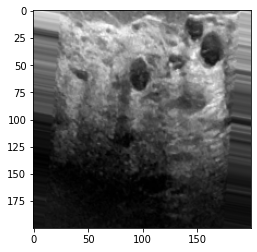

In [ ]:
plt.imshow(xtrain[8])
plt.show()

Build architecture with Conolution (Filter, Max pool, relu)
Flatten the ouput & connect to DL

In [ ]:
from tensorflow.keras import models,layers

model = models.Sequential()
model.add(layers.Conv2D(filters=30,kernel_size=(3,3),input_shape=(200,200,3),activation='relu'))
model.add(layers.Conv2D(filters=40,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=50,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(filters=60,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=70,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(filters=80,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

### ------------ shifting to flatten layer --------------
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1,activation='sigmoid'))

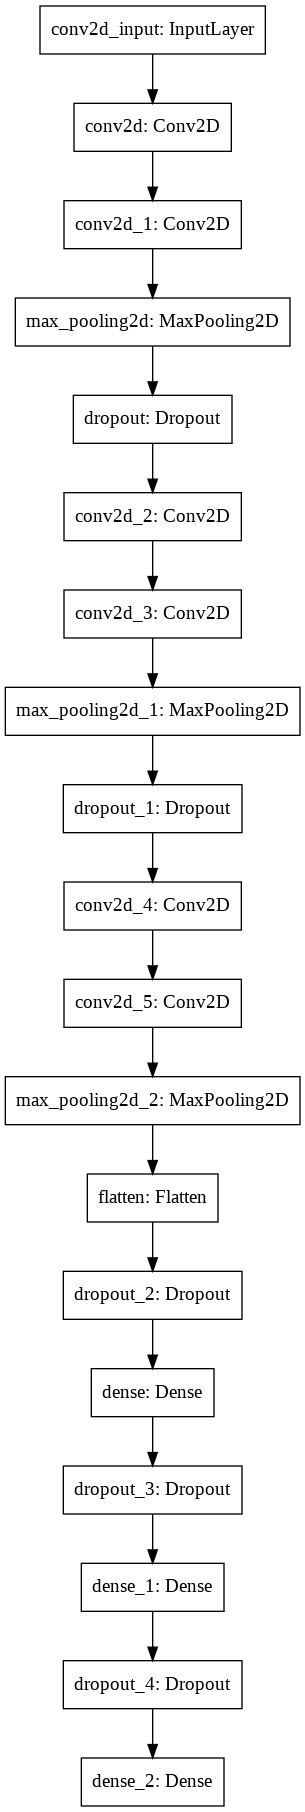

In [ ]:
plot_model(model)

Build model

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit_generator(train_generator,epochs=30,validation_data=test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
19/19 [==============================] - 44s 554ms/step - loss: 0.6524 - accuracy: 0.6705 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/30
19/19 [==============================] - 9s 465ms/step - loss: 0.5922 - accuracy: 0.6936 - val_loss: 0.6839 - val_accuracy: 0.5000
Epoch 3/30
19/19 [==============================] - 9s 475ms/step - loss: 0.5773 - accuracy: 0.7348 - val_loss: 0.6478 - val_accuracy: 0.7000
Epoch 4/30
19/19 [==============================] - 9s 470ms/step - loss: 0.5702 - accuracy: 0.7381 - val_loss: 0.7587 - val_accuracy: 0.5750
Epoch 5/30
19/19 [==============================] - 9s 467ms/step - loss: 0.5568 - accuracy: 0.7479 - val_loss: 0.5998 - val_accuracy: 0.6500
Epoch 6/30
19/19 [==============================] - 9s 467ms/step - loss: 0.5153 - accuracy: 0.7545 - val_loss: 0.4856 - val_accuracy: 0.7250
Epoch 7/30
19/19 [==============================] - 9s 474ms/step - loss: 0.5216 - accuracy: 0.7628 - val_loss: 0.6235 - val_accuracy: 0.7000
Epoch

In [ ]:
xtest,ytest = test_generator.next()
print(xtest.shape)
print(ytest.shape)

(32, 200, 200, 3)
(32,)


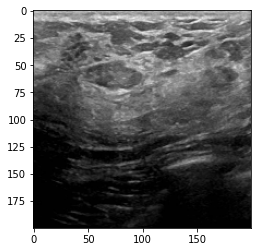

In [ ]:
plt.imshow(xtest[1])
plt.show()

**Prediction**

In [ ]:
xtest,ytest = test_generator.next()
print(xtest.shape)
print(ytest.shape)
 
prediction = model.predict(
    xtest, batch_size=40, verbose=0, steps=None, callbacks=None, max_queue_size=10,
    workers=1, use_multiprocessing=False)
 


(32, 200, 200, 3)
(32,)


**Compare Prediction with actual**

In [ ]:
 output = pd.DataFrame (prediction, ytest)
 output

,0
1.0,2.547251e-01
1.0,9.983873e-01
0.0,5.852596e-01
1.0,7.801323e-01
1.0,8.637400e-01
0.0,2.166455e-19
0.0,4.926580e-01
1.0,7.286507e-01
0.0,8.994054e-02
0.0,5.516804e-04


In [ ]:
ytest[3]

1.0

In [ ]:
datas,labels = train_generator.next()
filenames = test_generator.filenames
filenames

['benign/benign (418).png',
 'benign/benign (419).png',
 'benign/benign (420).png',
 'benign/benign (421).png',
 'benign/benign (422).png',
 'benign/benign (423).png',
 'benign/benign (424).png',
 'benign/benign (425).png',
 'benign/benign (426).png',
 'benign/benign (427).png',
 'benign/benign (428).png',
 'benign/benign (429).png',
 'benign/benign (430).png',
 'benign/benign (431).png',
 'benign/benign (432).png',
 'benign/benign (433).png',
 'benign/benign (434).png',
 'benign/benign (435).png',
 'benign/benign (436).png',
 'benign/benign (437).png',
 'malignant/malignant (191).png',
 'malignant/malignant (192).png',
 'malignant/malignant (193).png',
 'malignant/malignant (194).png',
 'malignant/malignant (195).png',
 'malignant/malignant (196).png',
 'malignant/malignant (197).png',
 'malignant/malignant (198).png',
 'malignant/malignant (199).png',
 'malignant/malignant (200).png',
 'malignant/malignant (201).png',
 'malignant/malignant (202).png',
 'malignant/malignant (203).png'